In [4]:
from datetime import datetime
type(datetime.now().strftime("%Y-%m-%d_%H:%M:%S"))

str

34742
tensor([0.0005], dtype=torch.float64)


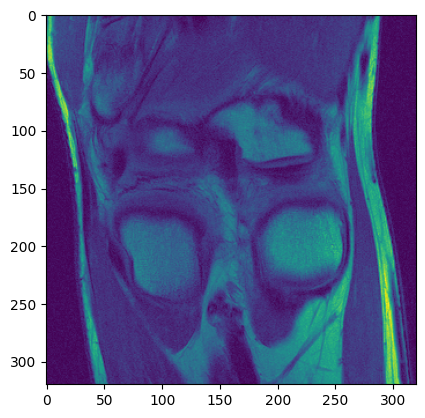

tensor([0.0002], dtype=torch.float64)


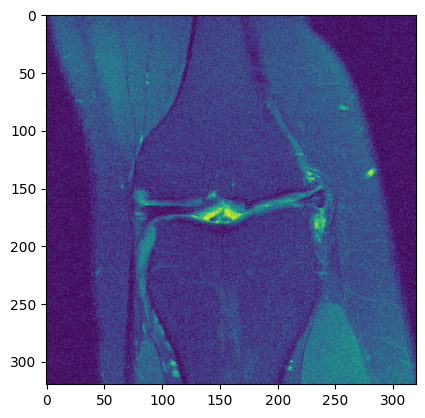

tensor([0.0002], dtype=torch.float64)


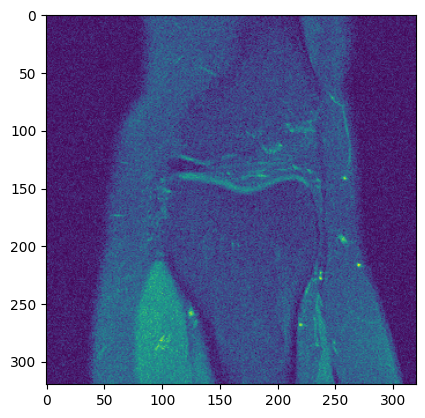

tensor([0.0003], dtype=torch.float64)


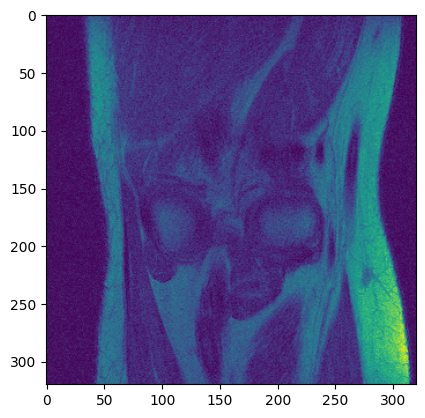

tensor([0.0009], dtype=torch.float64)


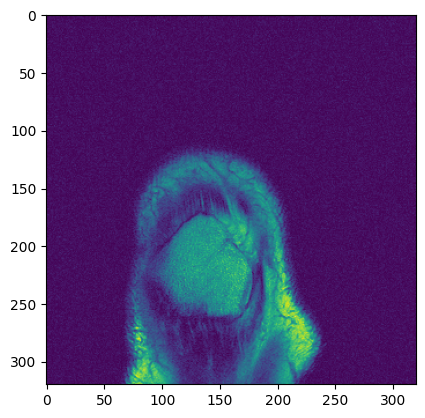

tensor([0.0010], dtype=torch.float64)


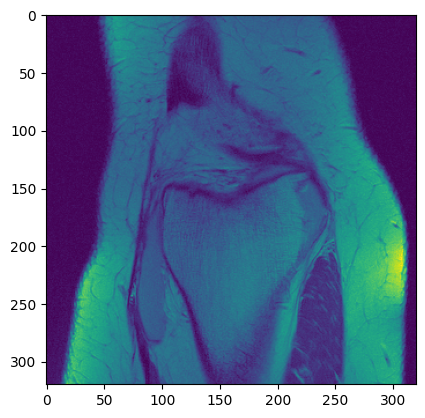

tensor([0.0002], dtype=torch.float64)


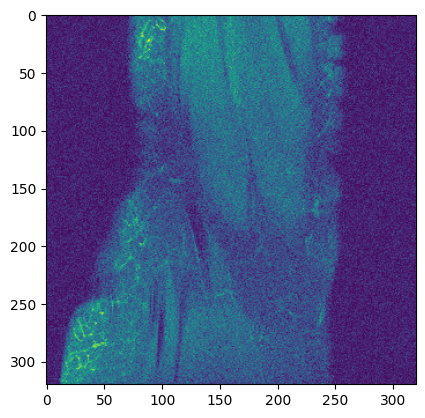

tensor([0.0002], dtype=torch.float64)


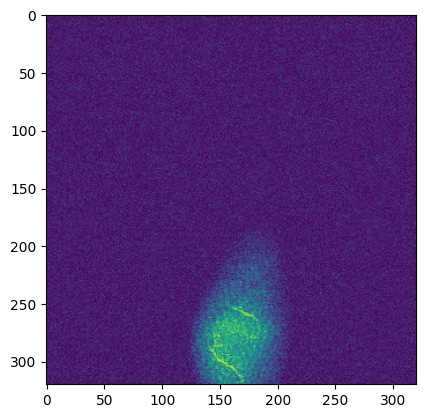

tensor([0.0002], dtype=torch.float64)


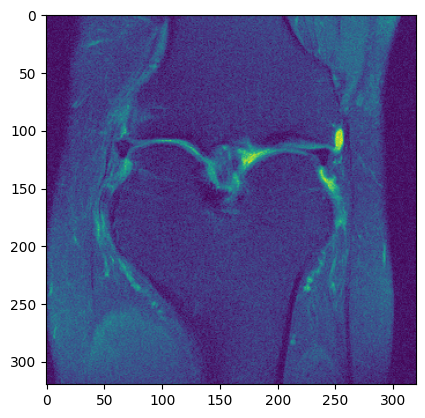

tensor([0.0014], dtype=torch.float64)


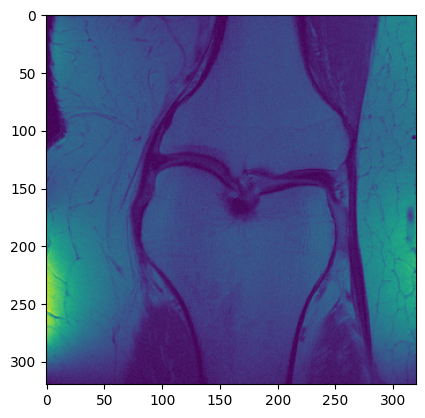

tensor([0.0002], dtype=torch.float64)


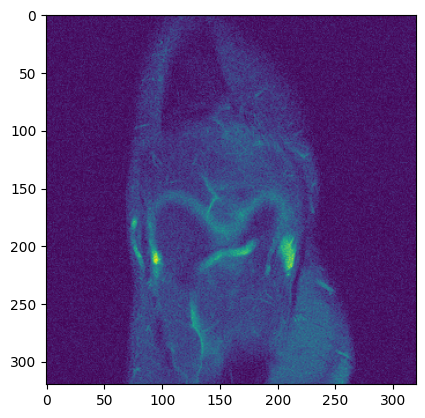

tensor([0.0005], dtype=torch.float64)


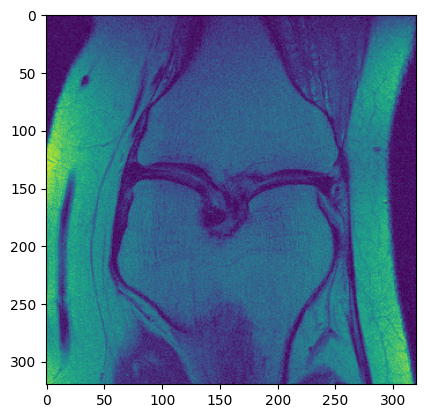

In [8]:
from fastmri.pl_modules import FastMriDataModule
from modules.transforms import KspaceLDMDataTransform
from pathlib import Path
import matplotlib.pyplot as plt

train_transform = KspaceLDMDataTransform()
val_transform = KspaceLDMDataTransform()
test_transform = KspaceLDMDataTransform()
# ptl data module - this handles data loaders
data_module = FastMriDataModule(
    data_path=Path("/vol/datasets/cil/2021_11_23_fastMRI_data/knee/unzipped"),
    challenge="singlecoil",
    train_transform=train_transform,
    val_transform=val_transform,
    test_transform=test_transform,
    combine_train_val=False,
    test_split="test",
    sample_rate=None,
    batch_size=1,
    num_workers=4,
    distributed_sampler=False,
    use_dataset_cache_file=True
)
dl = data_module.train_dataloader()
print(len(dl))
for i, batch in enumerate(dl):
    print(batch.max_value)
    plt.imshow(batch.target.squeeze(0))
    plt.show()
    if i > 10:
        break
    
